In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# mglearn
# pip install mglearn
import mglearn

from sklearn.model_selection import train_test_split

# Decision Tree

스무고개 게임 마냥..
맞춰가는거 생각해보자...

다중 조건문 

처음에 질문 잘 던져야 범위를 많이 좁힐 수 있다 / 처음질문에 따라 성능의 차이가 많이남

좋은 질문을 선택하는것도 알고리즘의 중요한 시작 

의사결정을 하기위해 tree 구조로 파생해 나간다 

### Graphviz
일반적인 그래프와는 달리 특수화된 그래프 
    - http://www.graphviz.org
     여기가서 설치도 해주기 
    - pip install graphviz


In [3]:
# !pip install graphviz

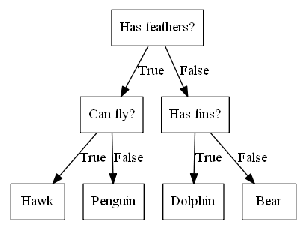

In [15]:
# graphviz   일시적으로 path 걸어주기 
# 운영체재와 관련된 여러가지 패키지 
import os 

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
# 환경변수environ에서 path를 불러오겠다 
# += 로 누적시켜줘야함, =하면 기존에 있던거 다 날아감 주의!!!!
# pathsep : 새로운 설정을 연결하기위한 중간 연결고리 

mglearn.plots.plot_animal_tree()
# plot_animal_tree : 의사결정트리의 기본 샘플용

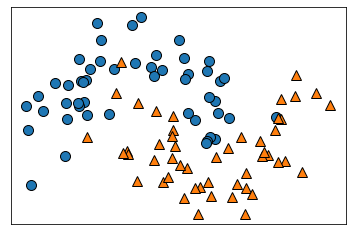

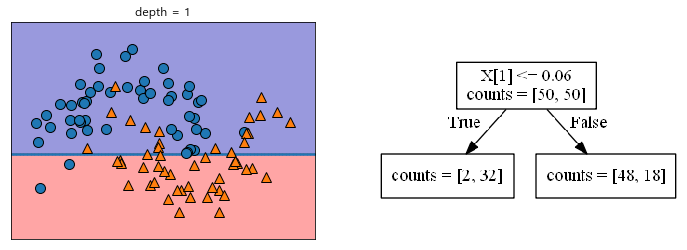

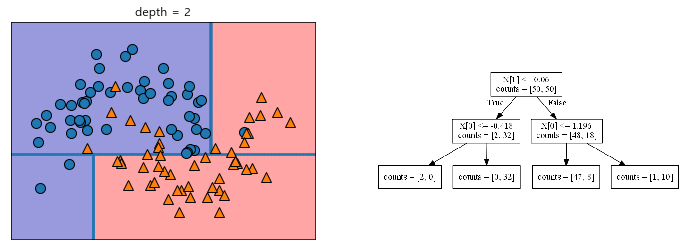

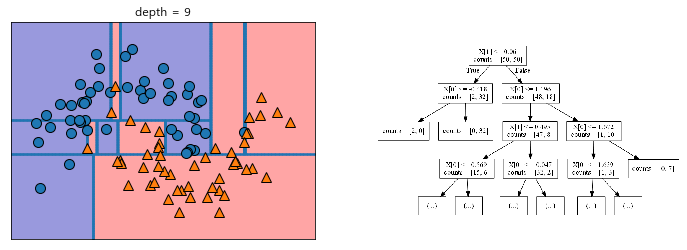

In [16]:
mglearn.plots.plot_tree_progressive()
# 직선으로만 분류하게된다면 성능이 떨어질것이다 
# 2차원 곡선으로 생각해봐도 내가 직접 계산해서 해본다? 힘들것이다
# 그 방법을 알려줌

# depth = 1 첫번째 질문을 던진다
# 특정 질문을 던져 입력값이 어느곳에 해당되는지 분류
# ~~ 9번까지 질문하면 100%에 가깝게 분류할수있다 는 것을 알려줌 
# 과대적합 상태 (훈련데이터 100%에 가까워진다)

# 가지를 어디까지 쳐야하는지 정하는것이 가장 큰 관건 = Prunning(가지치기)

### 복잡도 제어 : Prunning(가지치기)
    - 사전 가지치기
        어디까지 가지칠것인지 미리 정해놓는거
    - 사후 가지치기(Prunning)
    - sklearn에서는 사후 지치기만 지원
    
    - 매개변수
        max_depth 
        max_leaf_nodes : 리프 노드의 최대 개수를 지정
        min_samples_leaf : 리프 노드가 되기위한 최소한의 샘플 개수
        min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수 

In [180]:
# graphviz   일시적으로 path 걸어주기 
# 운영체재와 관련된 여러가지 패키지 
import os 

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
# 환경변수environ에서 path를 불러오겠다 
# += 로 누적시켜줘야함, =하면 기존에 있던거 다 날아감 주의!!!!
# pathsep : 새로운 설정을 연결하기위한 중간 연결고리 

In [4]:
from sklearn.tree import DecisionTreeClassifier

# 유방암 데이터 샘플
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # dict로 묶여있음 / data : 데이터 / target : 정답 / target names : 정답에 대한 설명

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, 
                                                   stratify=cancer.target) # stratify=cancer.target : 비율 맞춰주기  

In [5]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4) # random.state=0 : 난수 고정 / max_depth : 최대 가지의 길이 
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
# tree = DecisionTreeClassifier(random_state=0) # random.state=0 : 난수 고정 / max_depth 지정안해줌 = 끝까지 가보기 
# tree.fit(X_train, y_train)

In [7]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test)) #  나쁘지않다~~~
# 의사결정 알고리즘의 중요 특징 : 알고리즘 설명 가능 
# 트리구조로 선택되었기 때문에 그래프로 잘 보여주면 설명 가능 

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


In [8]:
# export_graphviz는 dot파일 읽어들여서 시각화 시키는 애 
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="data/tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True) # 어느위치에 무슨이름으로 저장할것인지
# 이렇게 저장해두면 필요할때마다 꺼내서 쓸수있다

In [9]:
import graphviz 

with open("C:/YS/pythonwork/AI/data/tree.dot") as f :
    dot_graph = f.read()
    
    # read : 전체파일 하나의 문자열로 읽어오는것
    # tree.dot 파일 - 연결프로그램 메모장 으로 변경 - 다른이름으로 저장할때 "ANSI" 로 바꿔서 저장 
    
# display 그래프로 그리는 함수
display(graphviz.Source(dot_graph))

# 필터링 제일 많이 할수있는게 첫번째 질문!
# worst radius <= 16.795 : 첫번째 질문 조건 / samples : 샘플 총 개수 / value : class당 개수 (양성, 음성) 
# 총 4개의 특성(가지)으로 판단하여 결론 난것을 볼수있다
# 가지가 많을수록 분석하기는 더 어려워질것 
# 가지치기를 통해 많이 걸러졌다는것은 그 특성이 굉장히 중요한 역할을 한다는 것을 의미 
# 가장 많이 걸러낸 변수를 보고서 분석하면 좋을거야.........ㅎ


# 위에서 따로 가지수를 지정해주지않으면 끝까지감
# 훈련용은 100%가 될것 
# but test용은 

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 144: illegal multibyte sequence

### 특성 중요도

In [187]:
print(tree.feature_importances_)  # 1에 가까울수록 중요 # 어떤 변수를 중요하게 생각하는지 0과 1사이 값으로 알려줌 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


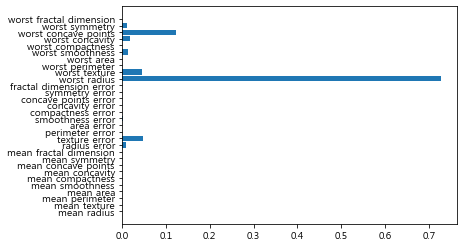

In [188]:
# 모델의 특성중요도를 그래프로 나타낸 함수 

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

plot_feature_importances_cancer(tree)

# 특성값이 0이라고해서 그래프 상에서 제외시키면 안된다

In [189]:
# 의사결정나무.pdf

# 어떤 질문을 먼저하느냐가 관건

# Entropy : 불확실성을 정하는 하나의 기준
#         : 질문의 옳고그름을 판단하는 기준 
#         : 0과 1사이의 값 : 값이 작으면(0에 가까우면) 불확실성 큰것 /  값이 크면(1에 가까운면) 불확실성 작은것
#         : 컴퓨터에게 불확실성 알려주는걸 숫자로 알려줘야하니.. 그걸알려주기위해서 만든게 Entropy 
#         : ex) class 종류 8개인 경우 entropy의 최대값은 3 (2^3 이 8이니 최대값은 3이 나옴)
#         : High Entropy : 어질러져있는것, 무언가를 찾아내기가 더 힘들다, 불확실하다 = 그래서 entropy가 높다고 하는것 


# p.6
# Infomation Gain : base entropy - new entropy : 기본 엔트로피에서 새롭게 추가되는 값을 뺀것
# 쉐넌의 공식
# Entropy([1+, 7-]) : 1장만 겨울가족사진이고 7장은 아니다 -> 불확실성 54% 


# p.7
# Information Gain을 통해 얻은 entropy 
# 만화로 뽑아낸것 13% / 겨울로 뽑아낸것 9% => 그래서 첫번째 질문은 만화로 해야겠다! 라는 결론을 내린것

# 불확실성이 제일 높은 것부터 정리하면 나중에 깔끔하게 정리될것이야~~~~~~~~~~~~~~~~~~~~~~~~~~~

### extrapolation(외삽)
    훈련 데이터의 범위 밖의 포인트에 대해서는 예측할 수 없다.

In [190]:
# 데이터 불러오기 
# ram_prices = pd.read_csv("data/ram_price.csv") # 파일로 불러올때 

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv")) 
# mglearn에서 직접 불러올때 / OS랑 연결시켜준다

ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


Text(0, 0.5, '가격($/Mbyte)')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


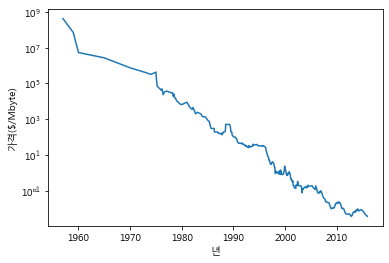

In [191]:
# 연속적인 시계열 그래프
plt.semilogy(ram_prices.date, ram_prices.price)

plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")

In [192]:
# 트리알고리즘 vs 선형모델
from sklearn.tree import DecisionTreeRegressor # 트리알고리즘
from sklearn.linear_model import LinearRegression # 선형모델 

In [193]:
# 2000년 전까지의 데이터로부터 2000년 후의 가격 예측 (선형회귀)
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [194]:
# 날짜 2차원배열로 뽑아주기 / 2차원배열로 넘겨줘야하니까.......
X_train = data_train.date[:, np.newaxis]
X_train

y_train = data_train.price
y_train

0      4.110418e+08
1      6.794772e+07
2      5.242880e+06
3      2.642412e+06
4      7.340030e+05
           ...     
197    7.800000e-01
198    8.700000e-01
199    1.040000e+00
200    1.340000e+00
201    2.350000e+00
Name: price, Length: 202, dtype: float64

In [195]:
# 훈련시키기 
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

In [196]:
# 예측은 전체 기간에 대해서 수령
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_linear = linear.predict(X_all)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


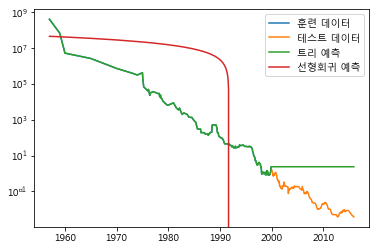

In [197]:
# 예측 결과 누가 더 잘 맞췄을지 그래프로 알아보기 

plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")

# 예측
plt.semilogy(ram_prices.date, pred_tree, label="트리 예측")
# 훈련받은 데이터로만 예측 가능하지 그밖에 데이터(2000년 이후)는 예측 불가능함을 보여줌 
# 트리 데이터는 훈련받은 데이터는 정말 정확하게 예측한다 
plt.semilogy(ram_prices.date, pred_linear, label="선형회귀 예측")
# 걍 망... 엉망...
# 굴곡이 있음.. 선형이 아님 / scale을 맞춰줘야함 -> log로 계산해주기 

plt.legend()

In [198]:
# Log로 계산해주기!!!
# scale(크기, 단위)이 안맞아서 변경해줘야함

X_train = data_train.date[:, np.newaxis]
X_train

y_train = np.log(data_train.price)
y_train

# 선형회귀분석에는 
# 날짜와 가격의 차이가 크기 때문에 scale을 완화시켜줘야함
# 때문에 log값으로 맞춰줘야한다 

# but 의사결정은 scale을 맞춰주지 않아도 된다는 장점이 있다

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [199]:
# 훈련시키기 
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

In [200]:
# 예측은 전체 기간에 대해서 수령
X_all = ram_prices.date[:, np.newaxis]

# scale(크기, 단위)이 안맞아서 지수로 변경해줘야함
pred_tree = np.exp(tree.predict(X_all))
pred_linear = np.exp(linear.predict(X_all))

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


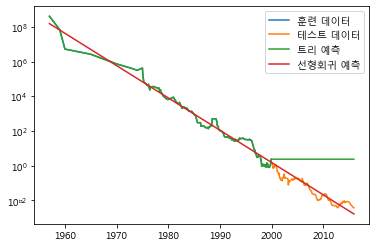

In [201]:
# 예측 결과 누가 더 잘 맞췄을지 그래프로 알아보기 

plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")

# 예측
plt.semilogy(ram_prices.date, pred_tree, label="트리 예측")
plt.semilogy(ram_prices.date, pred_linear, label="선형회귀 예측")

plt.legend()


# 시계열 데이터는 tree 알고리즘으로는 맞지않음을 볼수있다
# 각각의 데이터 특성에 맞는 알고리즘이 있다 


# 의사결정 알고리즘의 특징
# scale을 맞춰주지 않아도 된다는 장점이 있다
# 알고리즘 설명이 편하다 
# 특성(양적, 질적)의 구애를 받지않는다
# 가지치기 해도 과적합되는것을 막을수 없다

## 사례1 : iris 데이터 활용

In [202]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()

In [203]:
# 데이터 프레임으로 만들기 
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["result"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [204]:
# 훈련시키기
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [205]:
# scale 조정시에 사용
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

# scale조정된 값으로 사용하기 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # 근데 의사결정나무에서는 안해도되긴함..

In [206]:
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3).fit(X_train_std, y_train) 

In [207]:
print("훈련 정확도 : ", model.score(X_train_std, y_train)) # 98% KNN보다 높은 값 가져옴(1_머신러닝1 KNN 참고)
print("테스트 정확도 : ", model.score(X_test_std, y_test)) # 97% 좋은 성능을 가짐/ 그냥 샘플이 좋아서 KNN과 별 비교할게 없음 

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


## 사례2 : 서울 지역 동 분류

    서울 지역(구)의 경도와 위도를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류
    

In [208]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [209]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[["district", "longitude", "latitude", "label"]]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [210]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [211]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "longitude", "latitude", "label"]]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [212]:
# 현재 데이터 개수 확인
train_df.label.value_counts()
test_df.label.value_counts()

Gangdong    5
Gangbuk     5
Gangnam     5
Gangseo     5
Name: label, dtype: int64

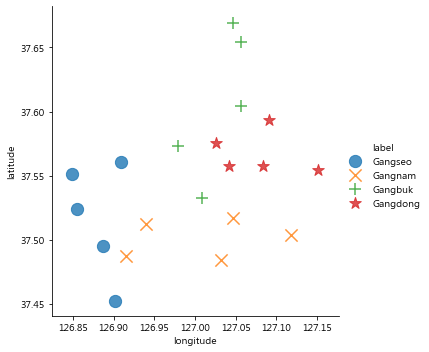

In [213]:
# 시각화

sns.lmplot("longitude", "latitude", data=train_df, markers=["o", "x", "+", "*"], hue="label",
          fit_reg=False, scatter_kws={"s":150})

In [214]:
# 성능 떨어뜨릴 필요없는 데이터 삭제
# 구이름과 동이름 삭제
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [215]:
train_df
test_df

,longitude,latitude,label
0,126.854547,37.489853,Gangseo
1,126.859245,37.501394,Gangseo
2,126.847951,37.537759,Gangseo
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo
5,127.030720,37.508838,Gangnam
6,127.057193,37.501163,Gangnam
7,127.018281,37.486401,Gangnam
8,126.988194,37.483279,Gangnam
9,127.043159,37.492896,Gangnam


In [216]:
# 컬럼을 나눠서 train, test 구별하기 

X_train = train_df[["longitude", "latitude"]]
y_train = train_df[["label"]]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df[["label"]]

In [217]:
# one hot encoding : 한부분에 강조 / 특정값을 강하게해서 구분해주는 
# 문자로 된것들 숫자로 바꿔주기 

from sklearn import preprocessing

In [218]:
# 전처리 
le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode # 강남, 강서, 강북, 강동 을 숫자로 바꿔줌 

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [219]:
# 훈련시키기 
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [220]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

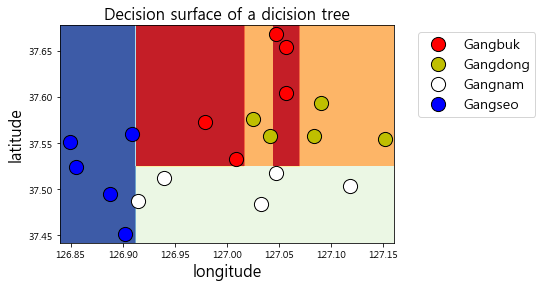

In [221]:
# 그래프그려보기
display_decision_surface(clf, X_train, y_encode) # 거의 100% 훈련한것같아요...과대적합

In [222]:
# 훈련시키기 
clf = DecisionTreeClassifier(random_state=70, max_depth=4,
                            min_samples_leaf=2, min_samples_split=2).fit(X_train, y_encode)

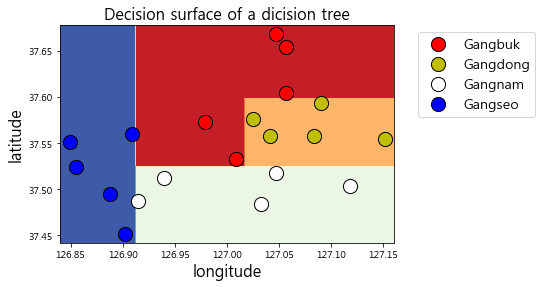

In [223]:
# 그래프그려보기
display_decision_surface(clf, X_train, y_encode) # 속성을 통해 성능 조절하기

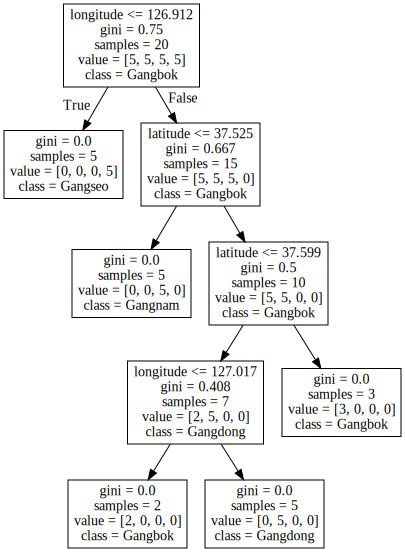

In [224]:
dot_data = export_graphviz(clf, out_file=None, feature_names = ["longitude", "latitude"], 
                          class_names = ["Gangbok", "Gangdong", "Gangnam", "Gangseo"])
graph = graphviz.Source(dot_data)
graph.render("seoul")
graph

In [225]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


# Random Forest

앙상블 기법

: 여러개의 모델을 사용하여 그 중 가장 좋은 모델 선택

: 여러개의 알고리즘 사용하여 성능 평균내기 그중에서 가장 좋은애는 무엇인가?!!?!!

-

Random Forest

: DecisionTree 알고리즘을 여러개로 나누어서 쓰는것

: 이중에서 제일 좋은것을 vote하여 사용하기

-

랜덤포레스트.pdf

: Decision Tree의 과대적합을 해결할수있다(p.3)

: boosting : 편향된 데이터를 수집할수있다 /  중복된 데이터 받던가 아예 못받을수 있는 데이터가 있을수도 있다  (p.3)

: Decision Tree 처럼 entropy를 계산해서 가장 좋은 질문을 선택하지 않음 / 무조건 랜덤으로 질문함 (p.4)

: voting : 랜덤으로 질문한것에 대한 대답을 투표해서 가장 많이 투표받은 대답을 결과값으로 제시함(여럿이서 결정한 사항이라 더 정확한 값을 제시함)  (p.5)

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
from sklearn import datasets

In [238]:
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=y)

In [239]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

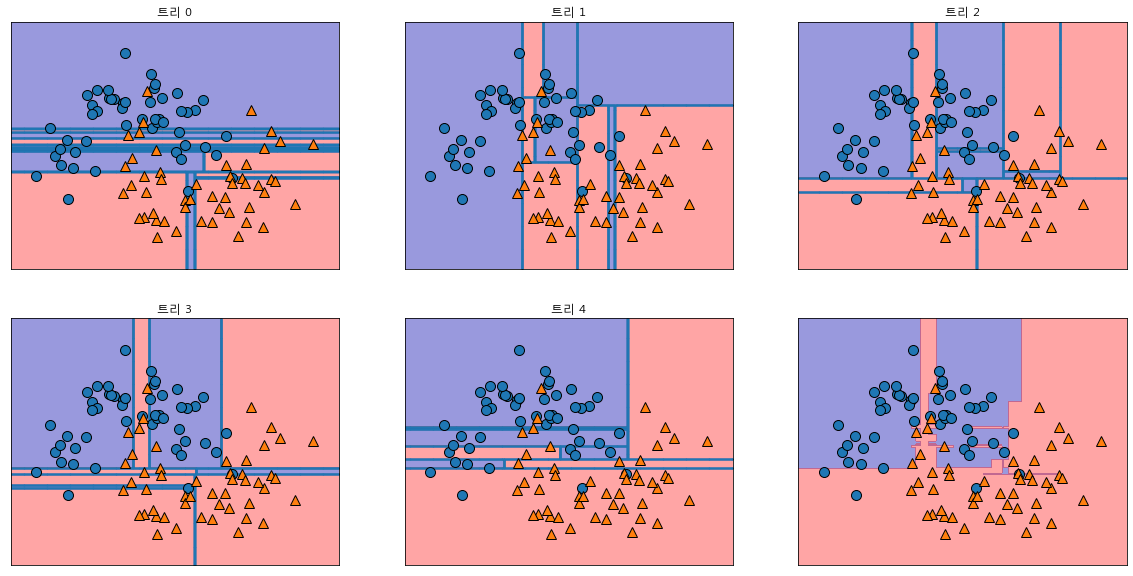

In [240]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [256]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [257]:
tree = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

In [258]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

# random forest 는 Decision tree보다 성능이 우수함

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


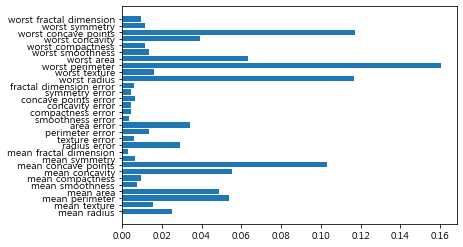

In [259]:
plot_feature_importances_cancer(tree)

In [266]:
# 손글씨 이미지 (교재 p.179)
mnist = datasets.load_digits()
mnist.data.shape
mnist.target # 0-9까지의 이미지를 정답으로 달아둠

features, labels = mnist.data, mnist.target # 두변수로 나누어 담기 # 데이터, 정답

In [268]:
# 교차검증(cross validation)
# test하기전에하는 과정 / 성능 우수해짐
# K-Folding (k번 접어서 검증한다)
# ex) 5개로 접어서 하나는 test 나머지 4개는 훈련용으로 / 한번씩 돌아가면서 테스트 한다
#     첫번째꺼 test용하면 2, 3, 4, 5 번 train / 이후 두번째꺼 test용하면 1, 3, 4, 5번 train / 등등 돌아가면서 진행
# 10번씩 교차검증한다 = 샘플을 10등분으로 나눈다

In [273]:
from sklearn.model_selection import cross_val_score

# 교차검증 공용 함수
def cross_validation(classifier, features, labels) :
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring="accuracy") # cv : 몇번교차할것인가
        cv_scores.append(scores.mean())
        
    return cv_scores

In [274]:
# 각각 10번씩 돌리느냐 시간 걸려요....
dt_cv_scores = cross_validation(DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


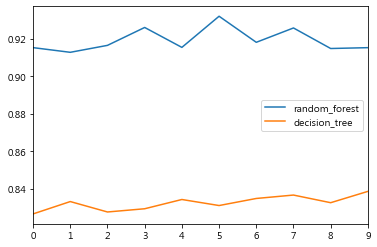

In [277]:
# 시각화를 통해 먼저 알아보자

cv_list = [["random_forest", rf_cv_scores], ["decision_tree", dt_cv_scores]] # column
df = pd.DataFrame.from_items(cv_list) # dataframe으로 만들어주기
df.head()
df.plot() # 그래프 만들기

In [278]:
print(np.mean(dt_cv_scores)) # 83%
print(np.mean(rf_cv_scores)) # 92% random forest로 할때 성능이 더 좋다 10차이나 남 ...

0.8323766344640429
0.919324306480851


In [ ]:
# 머신러닝 데이터셋
# https://archive.ics.uci.edu/ml/index.php

# 독버섯 유무 구분한 데이터셋
# https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

In [279]:
# 독버섯 데이터 코드로 직접 다운받기 
import urllib.request as req

savedir = "data/mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [288]:
# 첫번째 컬럼(p : 독버섯, e : 식용버섯) = 종속변수 y  / 나머지 독립변수 X
mr = pd.read_csv("data/mushrooms.csv", header=None)
mr.head()
# mr.shape

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [283]:
# 결측지 알아보기
mr.isnull().sum() # 없다!

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [286]:
# 데이터 설명
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [289]:
X = mr.drop(0, axis=1)
y = mr[0]

In [294]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [298]:
# 데이터를 숫자화
from sklearn.preprocessing import LabelEncoder

Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
    
Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

In [299]:
# 숫자로 변환 된 것을 볼수있음 
X.head()
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [301]:
data_train, data_test, label_train, label_test = train_test_split(X, y)

In [328]:
# 훈련
clf = RandomForestClassifier().fit(data_train, label_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [329]:
# 예측
pred = clf.predict(data_test)

In [330]:
from sklearn.metrics import accuracy_score, classification_report

# RandomForest로 했을때 결과 보기
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ

정답율 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00      1018

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [331]:
# 훈련
clf = DecisionTreeClassifier().fit(data_train, label_train)

In [332]:
# 예측
pred = clf.predict(data_test)

In [333]:
# Decision Tree 로 했을때 결과 보기
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ

정답율 : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00      1018

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [334]:
# KNN으로도 해보자
from sklearn.neighbors import KNeighborsClassifier

# 훈련
clf = KNeighborsClassifier().fit(data_train, label_train)

In [335]:
# 예측
pred = clf.predict(data_test)

In [336]:
# KNN 결과
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ # 재미없는 결과..

정답율 : 0.9955686853766618
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1013
           1       0.99      1.00      1.00      1018

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [338]:
# 로지스틱 회귀분석으로 해보자
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(data_train, label_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [339]:
# 예측
pred = clf.predict(data_test)

In [340]:
# 로지스틱 회귀분석 결과
print("정답율 :", accuracy_score(label_test, pred)) # test결과

# 정답율이 1이므로 적합도 검사도해보자
print(classification_report(label_test, pred)) # 적합도도 1이네...ㅎ # 재미없는 결과..

정답율 : 0.9502708025603152
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1013
           1       0.96      0.94      0.95      1018

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



# Gradient Boosting Regression Tree

- 회귀와 분류에서 모두 사용 가능


- 이전 트리의 오차를 보관하는 방식으로 트리 생성(경사 하강법-Graident Descent) 

    : 2차함수 형태에서 최소값이 무엇인지 알아보기 / 최소값 찾아가는 보폭 또한 중요한 요소
    
    
- 강력한 (사전)가지치기 사용


- 랜덤포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도 제공


- learning_rate를 사용하여 오차 보정

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [18]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test  = train_test_split(cancer.data, cancer.target, random_state=42)

In [26]:
# 기본값 : 깊이는 3, 트리의 개수는 100개, learning_rate=0.1
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train)) # 과적합
print("테스트 정확도 : ", tree.score(X_test, y_test))

# GradientBoostingClassifier는 하이퍼파라미터(조절값)에 따라서 정확도 값이 확연하게 차이난다
# 성능조절 : random_state, max_depth, learning_rate
# 다른 함수들은 성능조절 2가지(random_state, max_depth)만 가능하지만 
# GradientBoostingClassifier는 learning_rate도 추가하여 성능조절 3가지 가능하다
# 얘네를 잘사용해보아요......ㅎ

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [23]:
# 과적합 줄이기위해 max_depth 조절
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train)) # 위에꺼보다 훈련 정확도 값이 줄어듬을 볼수있다
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [24]:
# 과적합 줄이기위해  learning_mate(학습률) 조절
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train)) # 위에꺼보다 훈련 정확도 값이 줄어듬을 볼수있다
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


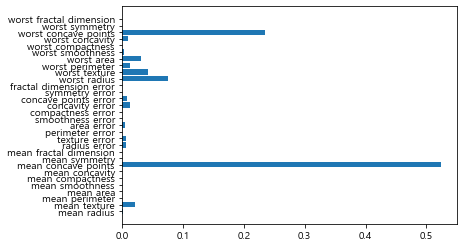

In [25]:
# 모델의 특성중요도를 그래프로 나타낸 함수 
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))
    
    
# 중요하다고 생각하는 특징들만 뽑아서 봄
plot_feature_importances_cancer(tree)